### 决策树
```
输入： 样本集D(x,y)和属性集A(a0, a1, ...)
输出： 决策函数
流程：
    生成一个node
    if D 中样本全属于同一类别C then 将node标记为C类的叶节点；return
    end if
    if A=nil or D中样本在A中取相同的值 then
        将node标记为叶节点，值为D中样本最多的类
    end if
    ***从A中选取最优划分属性a*
    for a* 中的每个具体属性ai do
        为node生成一个分支；令Dv表示D在ai的样本子集取值为ai(v)的样本子集
        if Dv 为空 then
           将分支节点标记为叶节点，其类别标记为D中样本最多的类；return
        else
           以 Dv 为新的样本集， A-a*为新的属性集 递归调用上述过程
        end if
    end for
```

#### 剪枝处理
预剪枝： 对每个节点在划分前先进行评估，若当前划分不能带来决策树泛化性能的提升，则停止划分，并将当前节点标记为叶节点
后剪枝： 先训练出一棵完整从决策树，然后自底向上的对叶节点进行考察，如果将该节点对应的子树替换为叶节点嫩更带来决策树泛化性能的提升，则将该字数替换为叶节点。

##### 数据处理
`连续值离散化`： 二分法
`缺失值处理`： 对于决策树来说，一种解决方式是：将样本x在划分属性a上取值未知的样本x同时以不同的概率（无缺失样本中在属性a上取值av的样本所占的比例）划分入所有的子节点。

##### 多变量决策树
不是为每个非叶节点寻找一个最优划分属性，而是试图建立一个合适的线性分类器。

In [87]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# 下面的代码解决中文乱码问题
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\Fonts\simsun.ttc", size=12)  

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "D:\\learningMaterial\\PythonLanguage\\NoteBook\\handson-ml"
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)


iris = load_iris()


In [15]:
X = iris.data[:, 2:]
print(X.shape)
y = iris.target
# 决策树分类器 max_depth 树的深度、
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

(150, 2)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf, 
    out_file=image_path("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [76]:
from matplotlib.colors import ListedColormap

# 绘制不同分类的边界
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    print(x1.shape, x2.shape)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    print(X_new.shape)
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='upper right', fontsize=10)
        

(100, 100) (100, 100)
(10000, 2)
Saving figure decision_tree_decision_boundaries_plot


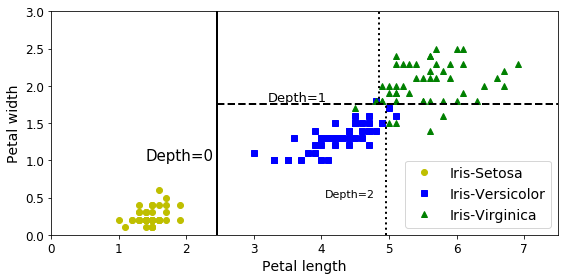

In [29]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0 ,3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'Depth=0', fontsize=15)
plt.text(3.2, 1.80, 'Depth=1', fontsize=13)
plt.text(4.05, 0.5, 'Depth=2', fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [47]:
#  决策树对于训练数据的更改非常的敏感，这是它不稳定的一个表现
# X[ (X[:, 1] == X[:,1][y==1].max()) & (y==1) ]

# bool 矩阵
not_widest_versicolor = (X[:, 1] != 1.8) | (y==2)
# 去除最值的样本
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

# 用变动后的数据重新训练
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

(100, 100) (100, 100)
(10000, 2)


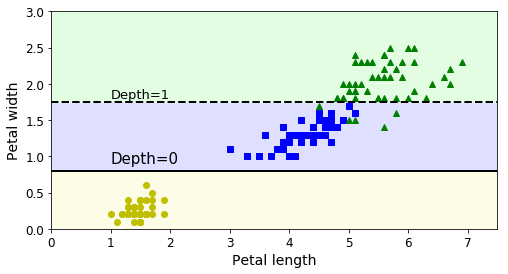

In [55]:
# 数据变更后的  决策树模型的表现
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
# 为什么作者知道这里是0.8和1.75是分界线呢？
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'Depth=0', fontsize=15)
plt.text(1.0, 1.80, 'Depth=1', fontsize=13)
plt.show()

In [60]:
# 通过设置一些超参数，改变模型的过拟合现象
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

print(Xm.shape, ym.shape)

(100, 2) (100,)


(100, 100) (100, 100)
(10000, 2)
(100, 100) (100, 100)
(10000, 2)


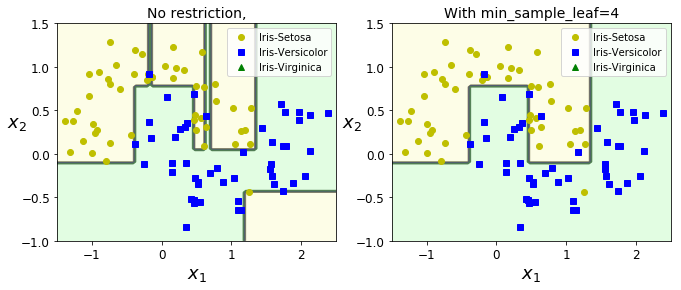

In [77]:
#  绘制限制了 叶节点的sample的最小值，防止过拟合现象
#  从下图可以看出，在限制了min_sample_leaf后的效果

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restriction,", fontsize=14)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("With min_sample_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show()



(2, 2)
(150, 2)
(100, 100) (100, 100)
(10000, 2)


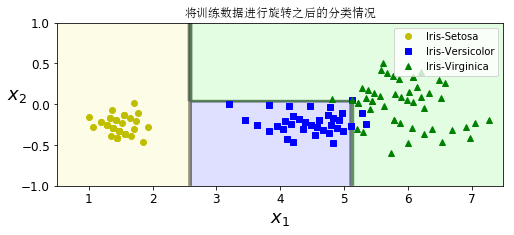

In [95]:
#  通过将数据进行旋转，考察决策树的抗干扰能力

#  根据 旋转角度 构造   旋转矩阵
angle = np.pi / 180 *20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
print(rotation_matrix.shape)
Xr = np.dot(X, rotation_matrix)
print(Xr.shape)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)
plt.title("将训练数据进行旋转之后的分类情况", fontproperties=font_set)
plt.show()

In [93]:
#  回归决策树

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)